# Wine Quality Analysis and Machine Learning

We use wine quality data with features such as citric acid levels, pH, alcohol, acidity, density, and so on. There was also a quality measure between 0 and 10. Our teams goal is analyse the two data sets, using Machine Learning to decide with various classification methods which yields the highest accuracy and to determine which features are most indicative of a high-quality wine


## 1. Importing library packages

In [1]:
!pip install dtreeviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import statsmodels.api as sm
from dtreeviz.trees import *
from scipy.stats import f_oneway 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import SVG
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

## 2. Reading the data

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


There are 1599 rows and 12 columns in total for red wine data and 4898 rows and 12 columns in total for white wine data. Although the data appears to be very clean, I wanted to ensure that there were no missing values.

### Missing Values


In [4]:
print(red.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
print(white.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Fortunately, we did not have to deal with any missing values. Next, we wanted to explore my data a little bit more.

## 3. Initial visual analysis

### Understand dependent variable: Quality

C:\Users\mtoy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

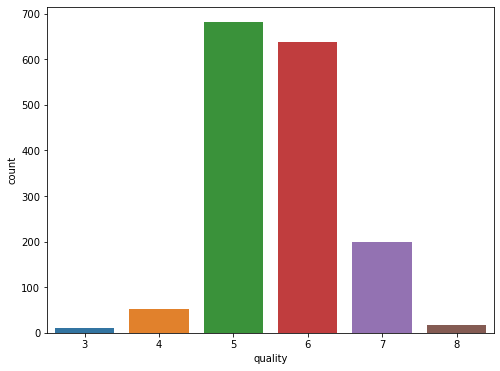

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(red["quality"])
red["quality"].value_counts()

C:\Users\mtoy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

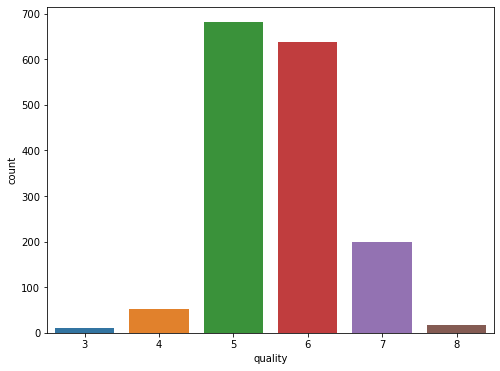

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(red["quality"])
white["quality"].value_counts()

### Histogram

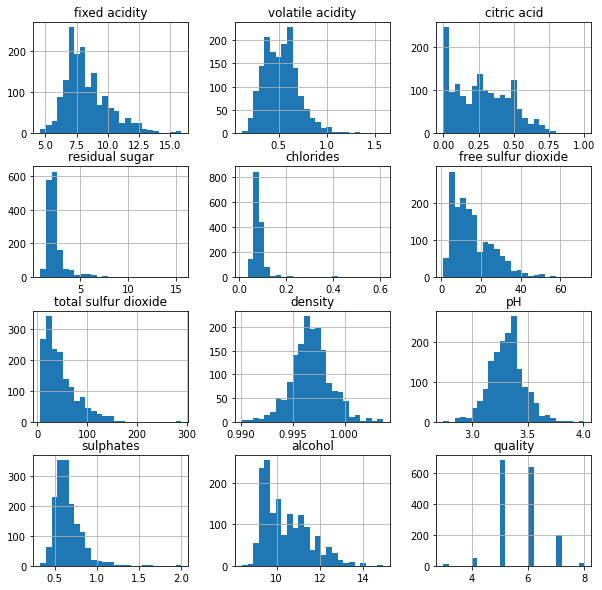

In [8]:
red.hist(bins=25,figsize=(10,10))
plt.show()

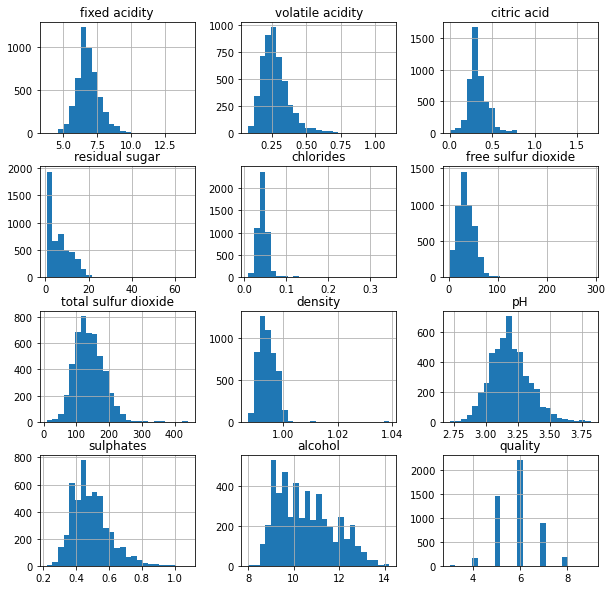

In [9]:
white.hist(bins=25,figsize=(10,10))
plt.show()

## 4. Data description

In [10]:
red.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [11]:
white.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

In [12]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Adding both white and red data

In [14]:
red['wine'] = 'red'
white['wine'] = 'white'
allwine = red.append(white)
allwine

C:\Users\mtoy\AppData\Local\Temp\ipykernel_22512\1849123887.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allwine = red.append(white)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [15]:
allwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


From now on, we will use All wine (both red and white data)

## 5. Statistics test

### Correlation Matrix

<AxesSubplot:>

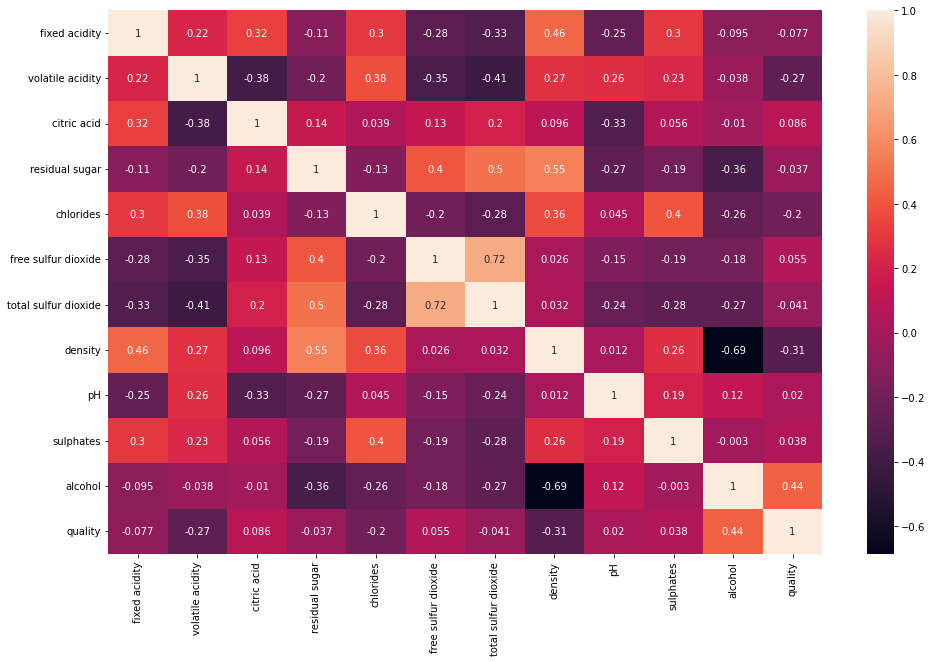

In [16]:
allwine1=allwine
allwine1.drop(columns="wine",axis=1,inplace=True)
plt.figure(figsize=(16,10))
sns.heatmap(allwine.corr(),annot=True)

### Liner Regression

In [17]:
#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = allwine[['sulphates']], allwine.quality

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.0014811295443142303


In [18]:
#define response variable
w = allwine['quality']
#define predictor variables
z=allwine[['alcohol','citric acid','sulphates','fixed acidity','residual sugar']]
#add constant to predictor variables
z=sm.add_constant(z)
#fit linear regression model
model = sm.OLS(w,z).fit()
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     381.8
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:31:07   Log-Likelihood:                -7500.3
No. Observations:                6497   AIC:                         1.501e+04
Df Residuals:                    6491   BIC:                         1.505e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8608      0.121     15.

### Compare red wine and white wine data

In [19]:
compare = red.loc[:,['alcohol','quality']]
compare = compare.rename(columns={'alcohol':'red alcohol','quality':'red quality',})
compare['white alcohol'] = white['alcohol']
compare['white quality'] = white['quality']
compare

,red alcohol,red quality,white alcohol,white quality
0,9.4,5,8.8,6
1,9.8,5,9.5,6
2,9.8,5,10.1,6
3,9.8,6,9.9,6
4,9.4,5,9.9,6
...,...,...,...,...
1594,10.5,5,9.4,6
1595,11.2,6,9.2,6
1596,11.0,6,11.9,5
1597,10.2,5,9.2,6


## 6. Machine Learning

## Classification

### Change the dependent variable (Quality) to a binary output

A bottle of wine was considered 'good quality' if it had a quality score of 7 or higher, and 'bad quality' if it had a score of less than 7.

In [20]:
# Create Classification
allwine['good'] = [1 if x >= 7 else 0 for x in allwine['quality']]


In [21]:
# define variables
X = allwine.drop(['quality','good'], axis = 1)
y = allwine['good']

We want to make sure the data is not skewed to one number. Therefore we will check to adjust as needed

In [22]:
allwine['good'].value_counts()

0    5220
1    1277
Name: good, dtype: int64

It seemed like a fair enough number

### Preparing split data

In [23]:
X_features = X
X = StandardScaler().fit_transform(X)
#Standardizing the data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)
#split 80-20

## Model 1: Decision Tree

In [25]:
red['wine'] = 'red'
white['wine'] = 'white'
allwine2 = red.append(white)

C:\Users\mtoy\AppData\Local\Temp\ipykernel_22512\194908789.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allwine2 = red.append(white)


In [26]:
features_1 = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

X = allwine2[features_1]
y = allwine2['wine']


[Text(0.5, 0.875, 'total sulfur dioxide <= 67.5\ngini = 0.371\nsamples = 6497\nvalue = [1599, 4898]'),
 Text(0.25, 0.625, 'chlorides <= 0.046\ngini = 0.182\nsamples = 1404\nvalue = [1262, 142]'),
 Text(0.125, 0.375, 'sulphates <= 0.555\ngini = 0.202\nsamples = 140\nvalue = [16, 124]'),
 Text(0.0625, 0.125, 'gini = 0.036\nsamples = 109\nvalue = [2, 107]'),
 Text(0.1875, 0.125, 'gini = 0.495\nsamples = 31\nvalue = [14, 17]'),
 Text(0.375, 0.375, 'sulphates <= 0.365\ngini = 0.028\nsamples = 1264\nvalue = [1246, 18]'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4375, 0.125, 'gini = 0.02\nsamples = 1258\nvalue = [1245, 13]'),
 Text(0.75, 0.625, 'chlorides <= 0.069\ngini = 0.124\nsamples = 5093\nvalue = [337, 4756]'),
 Text(0.625, 0.375, 'sulphates <= 1.125\ngini = 0.021\nsamples = 4598\nvalue = [48, 4550]'),
 Text(0.5625, 0.125, 'gini = 0.019\nsamples = 4595\nvalue = [45, 4550]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.875, 0

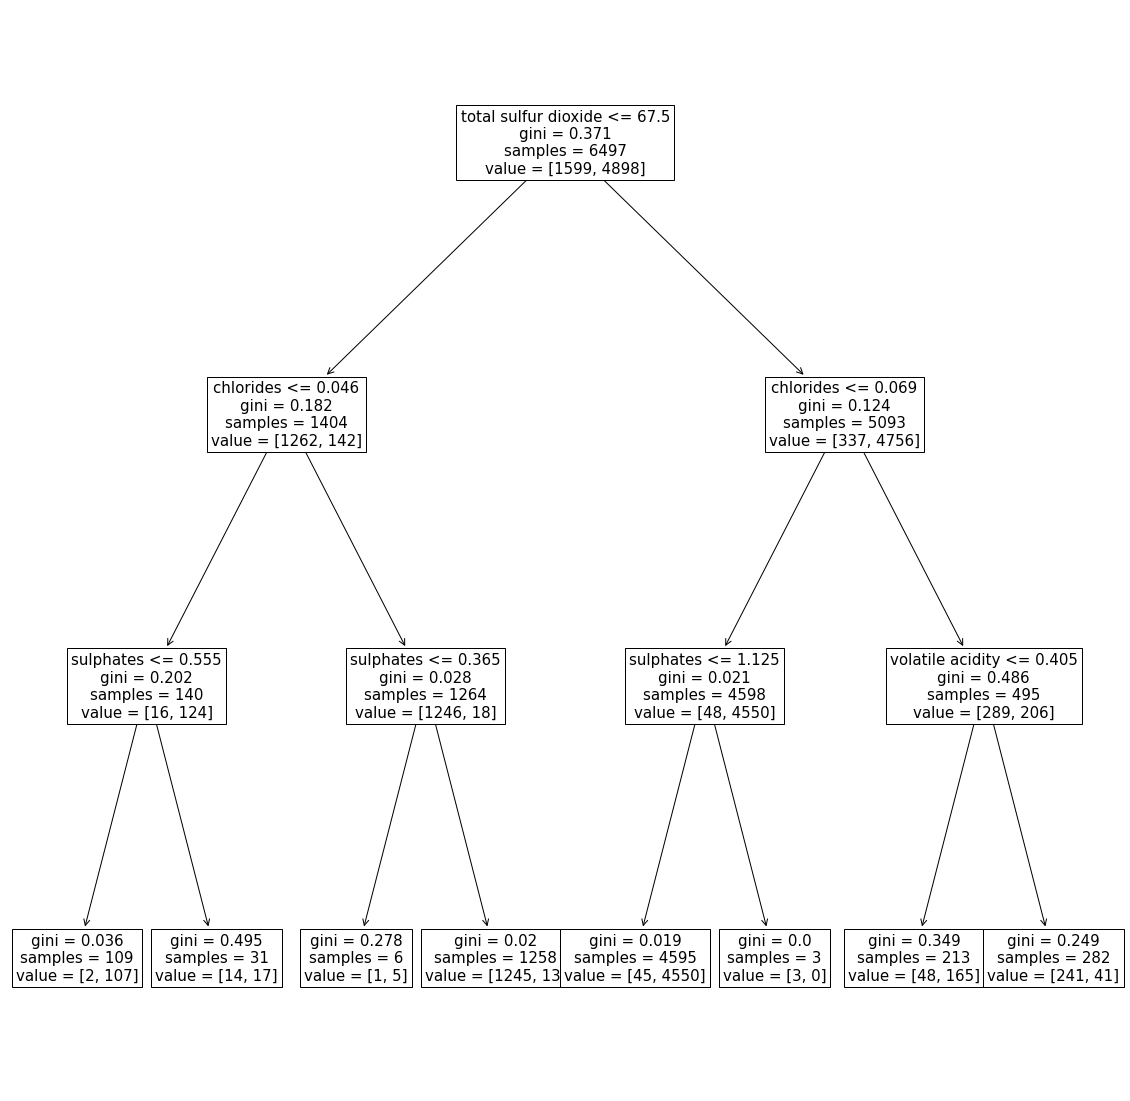

In [27]:
dtree = DecisionTreeClassifier(max_depth =3)
dtree = dtree.fit(X, y)

plt.figure(figsize=(20,20))
tree.plot_tree(dtree, feature_names=features_1, fontsize=15)

In [28]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1047
           1       0.58      0.68      0.63       253

    accuracy                           0.84      1300
   macro avg       0.75      0.78      0.76      1300
weighted avg       0.85      0.84      0.85      1300



## Model 2: Random Forest

In [29]:
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1047
           1       0.78      0.58      0.67       253

    accuracy                           0.89      1300
   macro avg       0.84      0.77      0.80      1300
weighted avg       0.88      0.89      0.88      1300



## Model 3: Support Vector Classifier

In [30]:
model3=SVC(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1047
           1       0.61      0.30      0.40       253

    accuracy                           0.83      1300
   macro avg       0.73      0.63      0.65      1300
weighted avg       0.80      0.83      0.80      1300



By comparing the three models, the random forest  model seems to yield the highest level of accuracy. Therefore, random forest  model is the winner

# 7. Most high-quality indicative features

Based on random forest model

<AxesSubplot:>

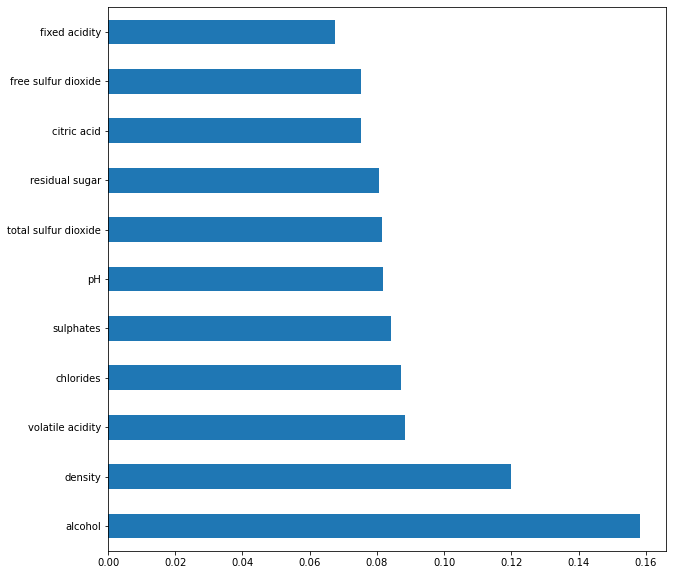

In [31]:
feat_quality = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_quality.nlargest(25).plot(kind='barh',figsize=(10,10))

The top 4 features are: alcohol, density, volatile acidity and chlorides

In [32]:
# Filtering data for only good quality
allwine_temp = allwine[allwine['good']==1]
allwine_temp.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.0
mean,7.085709,0.28917,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966,1.0
std,1.342832,0.11696,0.110040,4.063824,0.021014,15.344154,47.126201,0.003007,0.159094,0.161521,1.215620,0.376348,0.0
min,3.900000,0.08000,0.000000,0.800000,0.012000,3.000000,7.000000,0.987110,2.840000,0.220000,8.500000,7.000000,1.0
25%,6.300000,0.20000,0.280000,1.800000,0.033000,20.000000,87.000000,0.990720,3.120000,0.420000,10.700000,7.000000,1.0
50%,6.900000,0.27000,0.320000,2.900000,0.039000,31.000000,114.000000,0.992280,3.220000,0.510000,11.500000,7.000000,1.0
75%,7.400000,0.34000,0.380000,6.500000,0.051000,40.000000,140.000000,0.995000,3.340000,0.640000,12.400000,7.000000,1.0
max,15.600000,0.91500,0.760000,19.250000,0.358000,108.000000,289.000000,1.003200,3.820000,1.360000,14.200000,9.000000,1.0


In [33]:
# Filtering data for only bad quality
allwine_temp2 = allwine[allwine['good']==0]
allwine_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.0
mean,7.247011,0.352019,0.314720,5.593812,0.058837,30.395690,117.176533,0.995105,3.216262,0.528768,10.261462,5.490421,0.0
std,1.282968,0.172094,0.152466,4.901269,0.037145,18.288715,58.506354,0.002852,0.161135,0.145434,1.067408,0.605987,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987220,2.720000,0.230000,8.000000,3.000000,0.0
25%,6.400000,0.230000,0.240000,1.800000,0.040000,16.000000,74.000000,0.993000,3.110000,0.430000,9.400000,5.000000,0.0
50%,7.000000,0.300000,0.300000,3.000000,0.049000,28.000000,119.000000,0.995400,3.200000,0.510000,10.000000,6.000000,0.0
75%,7.700000,0.430000,0.400000,8.300000,0.069000,42.000000,160.000000,0.997200,3.320000,0.590000,11.000000,6.000000,0.0
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,6.000000,0.0


Combined with the detail on the Correlation Matrix we created above, we can see that good quality wines have higher levels of alcohol on average, have a lower density on average, lower volatile acidity on average, and lower levels of residual sugar on average.

# 8. Additional Support Vector Classifier

A support vector classifier with a linear model and supervised learning is used to determine if a wine is red or white.

In [34]:
red = pd.read_csv('winequality-red.csv', sep=';')
white =pd.read_csv('winequality-white.csv', sep=';')

In [35]:
#Set red equal to redT to create new df with red data
redT=red
#Add column to redT called 'type' and set values to red
redT['type'] = 'red'
#Display redT showing new 'type' column
redT

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [36]:
#Set white equal to whiteT to create new df with red data to prevent interference with other parts of project.
whiteT=white
#Add column to whiteT called 'type' and set values to white
whiteT['type'] = 'white'
#Display whiteT showing new 'type' column
whiteT

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [37]:
#Combine redT and whiteT into one data frame called allWineT
allWineT = pd.concat([redT, whiteT], axis = 0)
#Display allWineT
allWineT

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [38]:
#Define feature matrix. Derived from allWineT but has the 'type' column removed
X_allWineT = allWineT.drop('type', axis = 1)
#Display feature matrix shape and confirm that the 'type' column has been removed 
X_allWineT.shape

(6497, 12)

In [39]:
#Define target array (y_allWineT) as the 'type' column, which is the value to be predicted
y_allWineT = allWineT['type']
#Display target array shape
y_allWineT.shape

(6497,)

In [42]:
#Using train_test_split to divide feature matrix and target array into test and train data
#sklearn.model_selection.train_test_split
    #(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    #test_size = If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
    #train_size = If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
    #random_state = int. Controls the shuffling applied to the data before applying the split.
Xtrain, Xtest, ytrain, ytest = train_test_split(X_allWineT, y_allWineT, test_size = 0.2, train_size = 0.8, random_state=5)

In [43]:
#Using a SVC linear model
model = SVC(kernel='linear')
#Fitting the model to the training data
model.fit(Xtrain, ytrain)

SVC(kernel='linear')

In [44]:
#Using the test data to predict whether the wine is red or white
yfit = model.predict(Xtest)
#Print the yfit values
print(yfit)

['white' 'red' 'white' ... 'red' 'white' 'white']


In [45]:
#Print accuracy report
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

         red       0.98      0.95      0.97       304
       white       0.99      0.99      0.99       996

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.98      1300
weighted avg       0.98      0.98      0.98      1300

